In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

In [2]:
data_titanic = pd.read_csv('/Users/rishavghosh/Desktop/Bharat Intern/train.csv')

In [3]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data_titanic.shape

(891, 12)

In [7]:
data_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data_titanic.drop('Cabin', axis = 1, inplace=True)

In [9]:
data_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
data_titanic['Age'].fillna(data_titanic['Age'].mean(), inplace=True)

In [11]:
data_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [12]:
print(data_titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [13]:
data_titanic['Embarked'].fillna(data_titanic['Embarked'].mode()[0], inplace=True)

In [14]:
data_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
data_titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

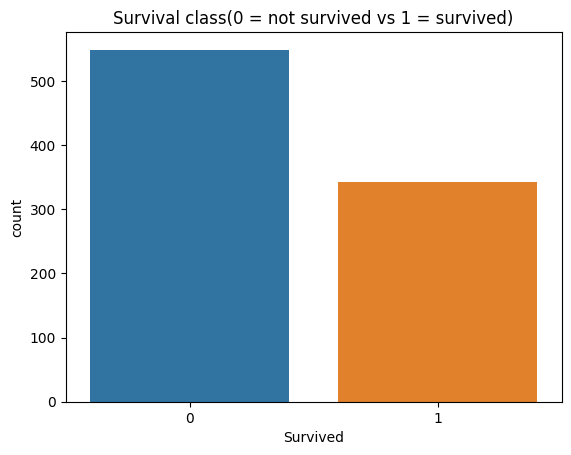

In [20]:
sns.countplot(x = 'Survived', data = data_titanic)
plt.title('Survival class(0 = not survived vs 1 = survived)')
plt.show()

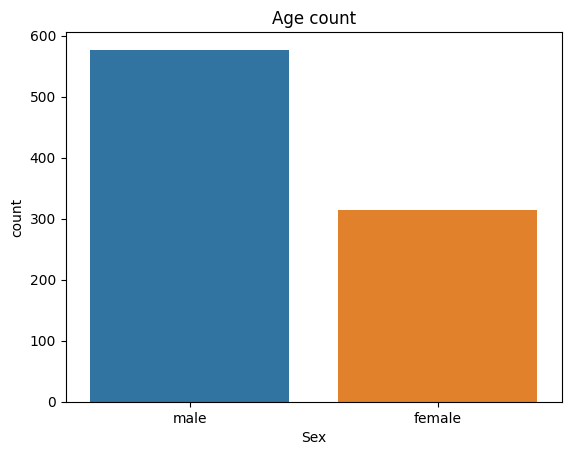

In [22]:
sns.countplot(x = 'Sex', data = data_titanic)
plt.title('Age count')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

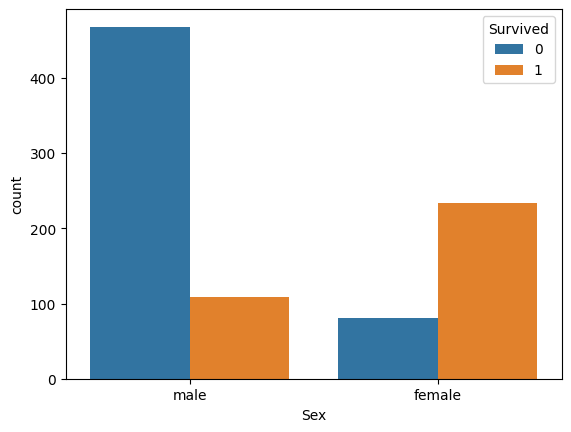

In [23]:
sns.countplot(x='Sex', hue='Survived', data=data_titanic)

<Axes: xlabel='Pclass', ylabel='count'>

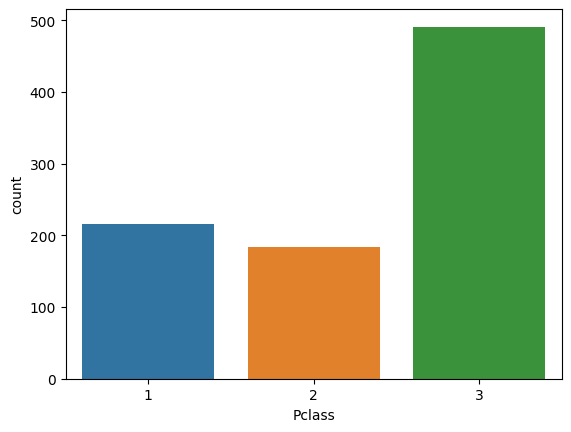

In [24]:
sns.countplot(x='Pclass', data=data_titanic)

<Axes: xlabel='Pclass', ylabel='count'>

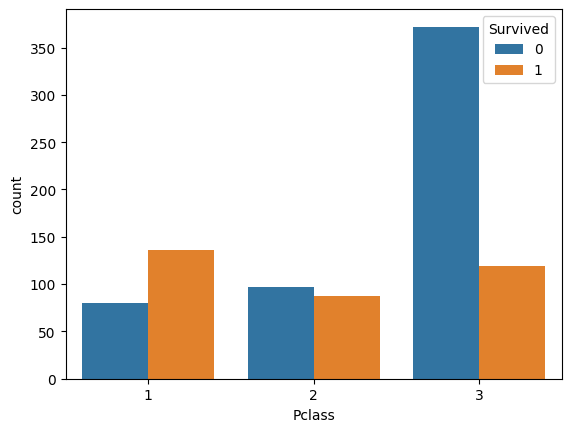

In [25]:
sns.countplot(x='Pclass', hue='Survived', data=data_titanic)

In [26]:
data_titanic.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

In [28]:
data_titanic['Embarked'].value_counts()

Embarked
0    646
1    168
2     77
Name: count, dtype: int64

In [32]:
x = data_titanic.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
y = data_titanic['Survived']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [34]:
model = RandomForestClassifier(random_state=101)

In [36]:
model.fit(x_train, y_train)

RandomForestClassifier(random_state=101)

In [38]:
train_pred = model.predict(x_train)

In [39]:
accuracy = accuracy_score(y_train, train_pred)
precision = precision_score(y_train, train_pred, average='weighted')
recall = recall_score(y_train, train_pred, average='weighted')
f1 = f1_score(y_train, train_pred, average='weighted')

print("Train Accuracy:", accuracy)
print("Train Precision:", precision)
print("Train Recall:", recall)
print("Train F1 Score:", f1)

Train Accuracy: 0.9859550561797753
Train Precision: 0.9859550561797753
Train Recall: 0.9859550561797753
Train F1 Score: 0.9859550561797753


In [40]:
test_pred = model.predict(x_test)

In [41]:
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred, average='weighted')
recall = recall_score(y_test, test_pred, average='weighted')
f1 = f1_score(y_test, test_pred, average='weighted')

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1 Score:", f1)

Test Accuracy: 0.7821229050279329
Test Precision: 0.7820369907775745
Test Recall: 0.7821229050279329
Test F1 Score: 0.7808586413172709


In [43]:
cm = confusion_matrix(y_test, test_pred)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


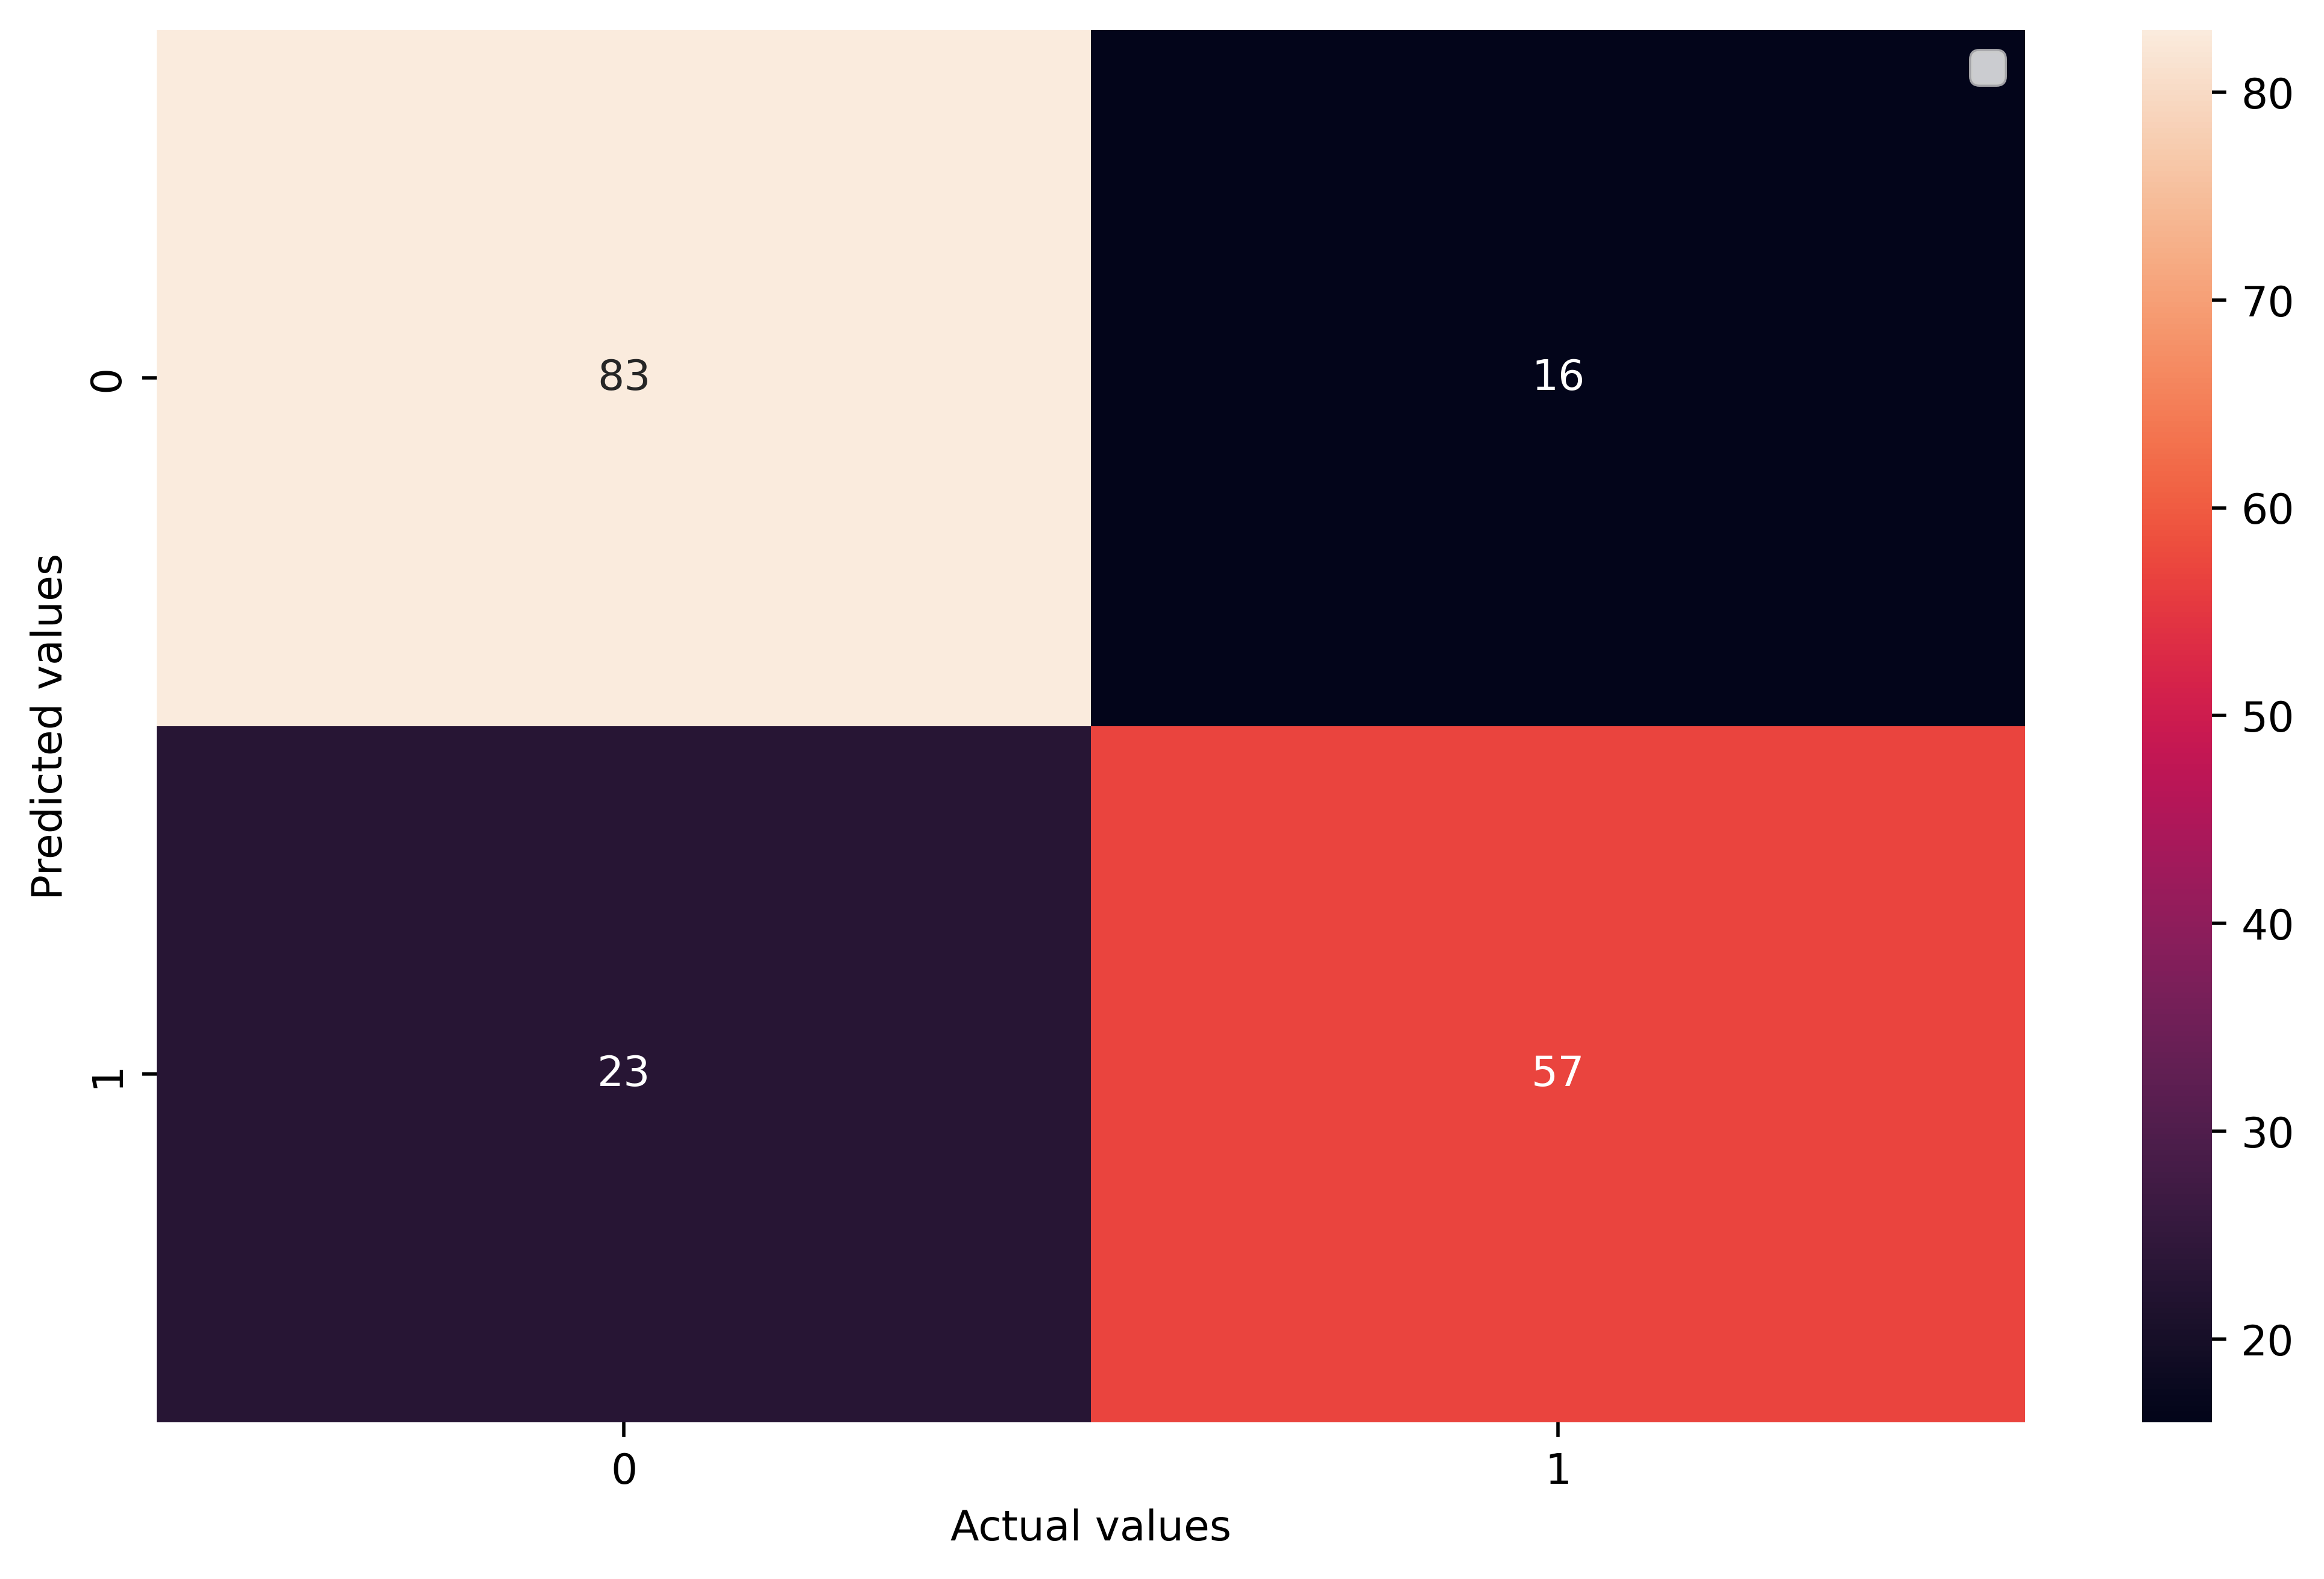

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6), dpi = 500)
sns.heatmap(cm, annot = True)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.legend()